In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
#upload kaggle.json file from local system
#this file get from kaggle api token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sivasoruby","key":"0df64f8f8853b7e6205d3792a0b03743"}'}

In [4]:
#create a kaggle folder
! mkdir ~/.kaggle

In [5]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [6]:
#permission for the json to act
! chmod 600  ~/.kaggle/kaggle.json

In [7]:
#including particular dataset in to our colab
#download dataset using API from dataset
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 149MB/s]


In [8]:
#extarct the zipfiles
!unzip weather-dataset-rattle-package.zip

Archive:  weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


In [9]:
#import the data
#Read CSV into dataframe using pandas library
df = pd.read_csv('/content/weatherAUS.csv')

In [10]:
#showing data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
#shape of data
df.shape

(145460, 23)

In [12]:
#showing data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
#describe data (statstical data)
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [14]:
#showing data data null columns if in this
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [15]:
#Data_precess: This function processes the "Date" column. It will simply create 3 new columns, one for the day,
#one for the month and one for the year, then it will delete the Date column because it will no longer provide any information.


def Date_process(dataframe):
  # Process Date
  dataframe['Date'] = pd.to_datetime(dataframe['Date'])
  dataframe['Year'] = dataframe['Date'].dt.year
  dataframe['Month'] = dataframe['Date'].dt.month
  dataframe['Day'] = dataframe['Date'].dt.day
  dataframe.drop(['Date'], axis=1, inplace=True)
  dataframe['RISK_MM'] = dataframe.Rainfall.shift(-1)

  return dataframe
#Rain_precess: This function treats the "RainToday" and "RainTomorrow" columns. These two columns have boolean data.
#It will simply replace the 'Yes' with 1 and 'No' with 0

def Rain_process(dataframe):
  # Process rain
  dataframe['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
  dataframe['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

  return dataframe

In [16]:
def model_1(dataframe):
  fake_df = Date_process(dataframe.copy())
  fake_df = Rain_process(fake_df)

  X = fake_df

  numerical_columns = [col for col in X.columns if X[col].dtypes != 'O']
  categorical_columns = [col for col in X.columns if X[col].dtypes == 'O']


  for col in numerical_columns:
      col_median = X[col].median()
      X[col].fillna(col_median, inplace=True)
  X['WindGustDir'].fillna(X['WindGustDir'].mode()[0], inplace=True)
  X['WindDir9am'].fillna(X['WindDir9am'].mode()[0], inplace=True)
  X['WindDir3pm'].fillna(X['WindDir3pm'].mode()[0], inplace=True)

  X = pd.get_dummies(X, columns= categorical_columns)
  X = X.dropna()
  target = X['RainTomorrow'].copy()
  X = X.drop(['RainTomorrow'], axis=1).copy()


  return X, target

In [17]:
X,y = model_1(df.copy())
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
X_train_full

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
90012,21.5,31.7,0.0,4.8,8.4,31.0,7.0,15.0,57.0,65.0,...,0,0,0,0,0,0,0,0,0,0
100362,9.0,17.6,1.0,3.6,5.7,48.0,17.0,28.0,96.0,53.0,...,0,0,0,0,0,0,1,0,0,0
116943,6.0,18.8,1.6,4.8,5.0,50.0,20.0,33.0,93.0,70.0,...,0,0,0,0,0,0,0,0,0,1
59452,-0.6,11.6,0.0,4.8,8.4,28.0,0.0,13.0,95.0,64.0,...,0,0,0,0,0,0,0,0,0,0
65155,9.6,24.4,0.0,4.6,11.1,39.0,48.0,50.0,58.0,27.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,17.8,38.1,0.0,26.0,8.4,39.0,7.0,13.0,61.0,30.0,...,0,0,0,0,0,0,0,0,0,0
97639,12.5,27.3,0.0,4.8,10.0,30.0,0.0,13.0,60.0,32.0,...,0,0,0,0,0,0,0,0,1,0
95939,17.0,29.8,0.0,5.6,8.4,22.0,4.0,13.0,77.0,54.0,...,0,0,0,0,0,0,0,0,0,0
117952,11.9,22.0,3.8,6.2,7.7,35.0,19.0,24.0,55.0,49.0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
X_valid, X_train = X_train_full[:53322] , X_train_full[53322:]
y_valid, y_train = y_train_full[:53322], y_train_full[53322:]

In [20]:
# case 1
model = keras.models.Sequential()
model.add(Dense(118, input_dim=118, activation='relu'))
model.add(Dense(59, input_dim=118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# case2
# to get optimize model with different activation function
#model = keras.models.Sequential()
#model.add(Dense(118, input_dim=118, activation='relu'))
#model.add(Dense(59, input_dim=118, activation='relu'))
#model.add(Dense(1, activation='softmax'))

In [ ]:
# case3
# to get optimize model with different activation function
#model = keras.models.Sequential()
#model.add(Dense(118, input_dim=118, activation='relu'))
#model.add(Dense(118, input_dim=118, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

In [21]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [22]:
def last_time_step_bce(Y_true, Y_pred):
    return tf.keras.metrics.binary_crossentropy(y_true, y_pred)

In [ ]:
#hyperparameter optimization
#model.compile(loss="mse",
              #optimizer="Adam",
              #metrics=["accuracy"])

In [23]:
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [ ]:
#hyperparameter optimization
#model.compile(loss="binary_crossentropy",
              #optimizer="rmsprop",
             # metrics=["accuracy"])

In [24]:
train = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/25
1743/1743 [==============================] - 17s 7ms/step - loss: 0.5079 - accuracy: 0.8768 - val_loss: 0.2389 - val_accuracy: 0.9112
Epoch 2/25
1743/1743 [==============================] - 12s 7ms/step - loss: 0.2475 - accuracy: 0.9432 - val_loss: 0.0317 - val_accuracy: 0.9888
Epoch 3/25
1743/1743 [==============================] - 9s 5ms/step - loss: 0.1731 - accuracy: 0.9637 - val_loss: 0.0409 - val_accuracy: 0.9806
Epoch 4/25
1743/1743 [==============================] - 11s 6ms/step - loss: 0.0952 - accuracy: 0.9739 - val_loss: 0.4401 - val_accuracy: 0.9352
Epoch 5/25
1743/1743 [==============================] - 11s 6ms/step - loss: 0.1051 - accuracy: 0.9746 - val_loss: 0.0194 - val_accuracy: 0.9925
Epoch 6/25
1743/1743 [==============================] - 9s 5ms/step - loss: 0.0524 - accuracy: 0.9828 - val_loss: 0.0217 - val_accuracy: 0.9934
Epoch 7/25
1743/1743 [==============================] - 9s 5ms/step - loss: 0.0473 - accuracy: 0.9835 - val_loss: 0.1444 - val_accur

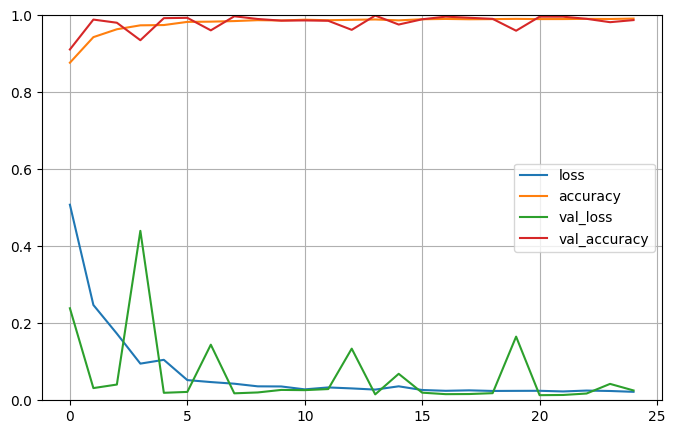

In [25]:
pd.DataFrame(train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
y_pred = model.predict(X_test)

1137/1137 [==============================] - 2s 1ms/step


In [27]:
model.evaluate(X_test, y_test)

1137/1137 [==============================] - 3s 3ms/step - loss: 0.0272 - accuracy: 0.9877


[0.027179481461644173, 0.9877354502677917]

In [28]:
rounded = [round(x[0]) for x in y_pred]

y_pred = rounded

In [29]:
cm_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                          columns=['No Rain', 'Rain'],
                          index=['No Rain', 'Rain'])
cm_matrix_coef =cm_matrix/cm_matrix.sum(axis=1)

In [30]:
f1_score(y_test, y_pred)

0.9726044226044226

In [31]:
cm_matrix

,No Rain,Rain
No Rain,28002,442
Rain,4,7917


In [32]:
cm_matrix_coef.style.background_gradient(cmap="Blues")

,No Rain,Rain
No Rain,0.984461,0.055801
Rain,0.000141,0.999495


In [33]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []

X,Y = model_1(df.copy())

for train, test in kfold.split(X, Y):

  training_data = X.iloc[train]
  training_validation_data = Y.iloc[train]

  test_data = X.iloc[test]
  test_validation_data = Y.iloc[test]

  model = keras.models.Sequential()
  model.add(Dense(118, input_dim=118, activation='relu'))
  model.add(Dense(59, input_dim=118, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

  model.fit(training_data, training_validation_data, epochs=25,
            callbacks=[early_stopping_cb])

  scores = model.evaluate(test_data, test_validation_data, verbose=0)
  cvscores.append(scores[1] * 100)

Epoch 1/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.3907 - accuracy: 0.9165

4092/4092 [==============================] - 15s 3ms/step - loss: 0.3940 - accuracy: 0.9163
Epoch 2/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.1369 - accuracy: 0.9705

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1368 - accuracy: 0.9705
Epoch 3/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9817

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0592 - accuracy: 0.9817
Epoch 4/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.0467 - accuracy: 0.9838

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0466 - accuracy: 0.9839
Epoch 5/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0351 - accuracy: 0.9867

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0352 - accuracy: 0.9867
Epoch 6/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9875

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0331 - accuracy: 0.9875
Epoch 7/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0333 - accuracy: 0.9884

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0332 - accuracy: 0.9884
Epoch 8/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0281 - accuracy: 0.9894

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0281 - accuracy: 0.9894
Epoch 9/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9903

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0252 - accuracy: 0.9903
Epoch 10/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0250 - accuracy: 0.9902

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0250 - accuracy: 0.9902
Epoch 11/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9909

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0238 - accuracy: 0.9909
Epoch 12/25
4081/4092 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9910

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0223 - accuracy: 0.9910
Epoch 13/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9913

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0224 - accuracy: 0.9913
Epoch 14/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9919

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0210 - accuracy: 0.9919
Epoch 15/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0221 - accuracy: 0.9913

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0221 - accuracy: 0.9913
Epoch 16/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9921

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0214 - accuracy: 0.9921
Epoch 17/25
4076/4092 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9921

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0203 - accuracy: 0.9921
Epoch 18/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9924

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0204 - accuracy: 0.9924
Epoch 19/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9924

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0196 - accuracy: 0.9924
Epoch 20/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9931

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0192 - accuracy: 0.9931
Epoch 21/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0178 - accuracy: 0.9934

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0178 - accuracy: 0.9934
Epoch 22/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9933

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0180 - accuracy: 0.9933
Epoch 23/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9937

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0166 - accuracy: 0.9937
Epoch 24/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0173 - accuracy: 0.9935
Epoch 25/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9933

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0175 - accuracy: 0.9933
Epoch 1/25
4081/4092 [============================>.] - ETA: 0s - loss: 0.7437 - accuracy: 0.9046

4092/4092 [==============================] - 15s 3ms/step - loss: 0.7420 - accuracy: 0.9047
Epoch 2/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9683

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1400 - accuracy: 0.9683
Epoch 3/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0896 - accuracy: 0.9787

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0896 - accuracy: 0.9787
Epoch 4/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0523 - accuracy: 0.9835

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0523 - accuracy: 0.9835
Epoch 5/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9861

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0381 - accuracy: 0.9861
Epoch 6/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0337 - accuracy: 0.9872

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0337 - accuracy: 0.9872
Epoch 7/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0300 - accuracy: 0.9889

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0300 - accuracy: 0.9889
Epoch 8/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9902

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0257 - accuracy: 0.9902
Epoch 9/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0245 - accuracy: 0.9903

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0245 - accuracy: 0.9904
Epoch 10/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0248 - accuracy: 0.9905

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0247 - accuracy: 0.9906
Epoch 11/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9912

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0224 - accuracy: 0.9912
Epoch 12/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9915

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0226 - accuracy: 0.9915
Epoch 13/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9917

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0225 - accuracy: 0.9917
Epoch 14/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9917

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0218 - accuracy: 0.9917
Epoch 15/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9912

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0233 - accuracy: 0.9912
Epoch 16/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9923

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0210 - accuracy: 0.9923
Epoch 17/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0197 - accuracy: 0.9925

4092/4092 [==============================] - 18s 4ms/step - loss: 0.0197 - accuracy: 0.9925
Epoch 18/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9920

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0223 - accuracy: 0.9920
Epoch 19/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0183 - accuracy: 0.9935
Epoch 20/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9932

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0189 - accuracy: 0.9932
Epoch 21/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9923

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0204 - accuracy: 0.9923
Epoch 22/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9934

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0176 - accuracy: 0.9934
Epoch 23/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0177 - accuracy: 0.9934

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0177 - accuracy: 0.9934
Epoch 24/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9934

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 25/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9937

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 1/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.5651 - accuracy: 0.9064

4092/4092 [==============================] - 15s 3ms/step - loss: 0.5644 - accuracy: 0.9065
Epoch 2/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.1722 - accuracy: 0.9681

4092/4092 [==============================] - 13s 3ms/step - loss: 0.1717 - accuracy: 0.9681
Epoch 3/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9792

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0780 - accuracy: 0.9792
Epoch 4/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9834

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0526 - accuracy: 0.9834
Epoch 5/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.0383 - accuracy: 0.9857

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0384 - accuracy: 0.9857
Epoch 6/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0310 - accuracy: 0.9884

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0310 - accuracy: 0.9884
Epoch 7/25
4076/4092 [============================>.] - ETA: 0s - loss: 0.0299 - accuracy: 0.9886

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0300 - accuracy: 0.9886
Epoch 8/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9889

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0290 - accuracy: 0.9889
Epoch 9/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9900

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0249 - accuracy: 0.9899
Epoch 10/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9911

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0236 - accuracy: 0.9910
Epoch 11/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0251 - accuracy: 0.9903

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0252 - accuracy: 0.9903
Epoch 12/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9909

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0240 - accuracy: 0.9908
Epoch 13/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9914

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0227 - accuracy: 0.9914
Epoch 14/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9915

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0226 - accuracy: 0.9915
Epoch 15/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9919

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0218 - accuracy: 0.9918
Epoch 16/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9924

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0196 - accuracy: 0.9924
Epoch 17/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9922

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0207 - accuracy: 0.9922
Epoch 18/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9931

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0181 - accuracy: 0.9931
Epoch 19/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9924

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0203 - accuracy: 0.9924
Epoch 20/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9920

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0222 - accuracy: 0.9920
Epoch 21/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9929

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0200 - accuracy: 0.9929
Epoch 22/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9925

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 23/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9928

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0208 - accuracy: 0.9928
Epoch 24/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9941

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0172 - accuracy: 0.9941
Epoch 25/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9941

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 1/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.4699 - accuracy: 0.9122

4092/4092 [==============================] - 15s 3ms/step - loss: 0.4696 - accuracy: 0.9122
Epoch 2/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.1274 - accuracy: 0.9695

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1273 - accuracy: 0.9696
Epoch 3/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0734 - accuracy: 0.9797

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0733 - accuracy: 0.9797
Epoch 4/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.9840

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0493 - accuracy: 0.9840
Epoch 5/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9864

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0387 - accuracy: 0.9864
Epoch 6/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9878

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0306 - accuracy: 0.9878
Epoch 7/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9882

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0303 - accuracy: 0.9882
Epoch 8/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9897

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0280 - accuracy: 0.9897
Epoch 9/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9897

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0270 - accuracy: 0.9897
Epoch 10/25
4081/4092 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9904

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0253 - accuracy: 0.9904
Epoch 11/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9911

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0234 - accuracy: 0.9911
Epoch 12/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9912

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0219 - accuracy: 0.9912
Epoch 13/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9914

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0219 - accuracy: 0.9914
Epoch 14/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9917

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0215 - accuracy: 0.9917
Epoch 15/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9921

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0207 - accuracy: 0.9921
Epoch 16/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9927

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0190 - accuracy: 0.9927
Epoch 17/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9925

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0200 - accuracy: 0.9925
Epoch 18/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9933

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0181 - accuracy: 0.9933
Epoch 19/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9926

4092/4092 [==============================] - 13s 3ms/step - loss: 0.0196 - accuracy: 0.9926
Epoch 20/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9930

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0189 - accuracy: 0.9930
Epoch 21/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9925

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0199 - accuracy: 0.9925
Epoch 22/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9933

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0187 - accuracy: 0.9933
Epoch 23/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9929

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0191 - accuracy: 0.9929
Epoch 24/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0183 - accuracy: 0.9935
Epoch 25/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9932

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0184 - accuracy: 0.9932
Epoch 1/25
4081/4092 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.9109

4092/4092 [==============================] - 15s 3ms/step - loss: 0.4500 - accuracy: 0.9109
Epoch 2/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9691

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1411 - accuracy: 0.9692
Epoch 3/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9811

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0617 - accuracy: 0.9811
Epoch 4/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9850

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0413 - accuracy: 0.9850
Epoch 5/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0384 - accuracy: 0.9858

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0384 - accuracy: 0.9858
Epoch 6/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.0326 - accuracy: 0.9874

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0327 - accuracy: 0.9873
Epoch 7/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9893

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0278 - accuracy: 0.9893
Epoch 8/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0284 - accuracy: 0.9890

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0283 - accuracy: 0.9890
Epoch 9/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0269 - accuracy: 0.9894

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0268 - accuracy: 0.9894
Epoch 10/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9912

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0231 - accuracy: 0.9912
Epoch 11/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9912

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0226 - accuracy: 0.9912
Epoch 12/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9906

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0247 - accuracy: 0.9906
Epoch 13/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0228 - accuracy: 0.9913

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0227 - accuracy: 0.9913
Epoch 14/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9914

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0226 - accuracy: 0.9914
Epoch 15/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9923

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0199 - accuracy: 0.9923
Epoch 16/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9924

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0204 - accuracy: 0.9924
Epoch 17/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9926

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0199 - accuracy: 0.9926
Epoch 18/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0194 - accuracy: 0.9927

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0194 - accuracy: 0.9928
Epoch 19/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9933

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0179 - accuracy: 0.9932
Epoch 20/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9923

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0201 - accuracy: 0.9923
Epoch 21/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9936

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0171 - accuracy: 0.9936
Epoch 22/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9932

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0188 - accuracy: 0.9932
Epoch 23/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0178 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0178 - accuracy: 0.9935
Epoch 24/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9932

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0180 - accuracy: 0.9932
Epoch 25/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9938

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0179 - accuracy: 0.9938
Epoch 1/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.4396 - accuracy: 0.9142

4092/4092 [==============================] - 15s 3ms/step - loss: 0.4382 - accuracy: 0.9145
Epoch 2/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.1262 - accuracy: 0.9693

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1259 - accuracy: 0.9694
Epoch 3/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0740 - accuracy: 0.9806

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0739 - accuracy: 0.9806
Epoch 4/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0456 - accuracy: 0.9849

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0457 - accuracy: 0.9848
Epoch 5/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9861

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0388 - accuracy: 0.9862
Epoch 6/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0312 - accuracy: 0.9879

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0312 - accuracy: 0.9879
Epoch 7/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9885

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0298 - accuracy: 0.9885
Epoch 8/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9894

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0292 - accuracy: 0.9894
Epoch 9/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0265 - accuracy: 0.9894

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0264 - accuracy: 0.9894
Epoch 10/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9900

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0263 - accuracy: 0.9900
Epoch 11/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9904

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0247 - accuracy: 0.9904
Epoch 12/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9905

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0241 - accuracy: 0.9905
Epoch 13/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9909

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0237 - accuracy: 0.9909
Epoch 14/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9915

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0223 - accuracy: 0.9915
Epoch 15/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9919

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0213 - accuracy: 0.9919
Epoch 16/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9919

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0211 - accuracy: 0.9919
Epoch 17/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9924

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0200 - accuracy: 0.9924
Epoch 18/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9926

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0204 - accuracy: 0.9926
Epoch 19/25
4076/4092 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9932

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0181 - accuracy: 0.9932
Epoch 20/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9925

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0195 - accuracy: 0.9925
Epoch 21/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9928

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0194 - accuracy: 0.9928
Epoch 22/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9932

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0184 - accuracy: 0.9932
Epoch 23/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9934

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0176 - accuracy: 0.9934
Epoch 24/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9939

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0173 - accuracy: 0.9939
Epoch 25/25
4079/4092 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9939

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0167 - accuracy: 0.9939
Epoch 1/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.4121 - accuracy: 0.9201

4092/4092 [==============================] - 15s 3ms/step - loss: 0.4119 - accuracy: 0.9202
Epoch 2/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.1148 - accuracy: 0.9729

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1147 - accuracy: 0.9729
Epoch 3/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0627 - accuracy: 0.9807

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0626 - accuracy: 0.9807
Epoch 4/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9845

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0414 - accuracy: 0.9845
Epoch 5/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0356 - accuracy: 0.9865

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0356 - accuracy: 0.9865
Epoch 6/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9881

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0314 - accuracy: 0.9881
Epoch 7/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9889

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0290 - accuracy: 0.9890
Epoch 8/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9893

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0276 - accuracy: 0.9894
Epoch 9/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0270 - accuracy: 0.9895

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0271 - accuracy: 0.9895
Epoch 10/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9898

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0253 - accuracy: 0.9898
Epoch 11/25
4080/4092 [============================>.] - ETA: 0s - loss: 0.0251 - accuracy: 0.9906

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0251 - accuracy: 0.9906
Epoch 12/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9911

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0222 - accuracy: 0.9911
Epoch 13/25
4081/4092 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9908

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0237 - accuracy: 0.9908
Epoch 14/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9912

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0227 - accuracy: 0.9912
Epoch 15/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9920

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0200 - accuracy: 0.9920
Epoch 16/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9930

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0195 - accuracy: 0.9930
Epoch 17/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9926

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0203 - accuracy: 0.9926
Epoch 18/25
4081/4092 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9923

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0209 - accuracy: 0.9923
Epoch 19/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9922

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0198 - accuracy: 0.9922
Epoch 20/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9925

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0206 - accuracy: 0.9925
Epoch 21/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9931

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0180 - accuracy: 0.9931
Epoch 22/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9930

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0188 - accuracy: 0.9930
Epoch 23/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9931

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0179 - accuracy: 0.9931
Epoch 24/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0174 - accuracy: 0.9935
Epoch 25/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9937

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0167 - accuracy: 0.9937
Epoch 1/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.9086

4092/4092 [==============================] - 15s 3ms/step - loss: 0.4605 - accuracy: 0.9088
Epoch 2/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9664

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1880 - accuracy: 0.9664
Epoch 3/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0709 - accuracy: 0.9805

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0707 - accuracy: 0.9805
Epoch 4/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0463 - accuracy: 0.9838

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0462 - accuracy: 0.9838
Epoch 5/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.9857

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0382 - accuracy: 0.9857
Epoch 6/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0324 - accuracy: 0.9872

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0325 - accuracy: 0.9872
Epoch 7/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0273 - accuracy: 0.9892

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0274 - accuracy: 0.9892
Epoch 8/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9886

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0292 - accuracy: 0.9886
Epoch 9/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9906

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0234 - accuracy: 0.9907
Epoch 10/25
4076/4092 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9908

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0246 - accuracy: 0.9908
Epoch 11/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9910

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0227 - accuracy: 0.9910
Epoch 12/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9910

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0237 - accuracy: 0.9910
Epoch 13/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9915

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0217 - accuracy: 0.9915
Epoch 14/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9914

4092/4092 [==============================] - 14s 4ms/step - loss: 0.0223 - accuracy: 0.9914
Epoch 15/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9921

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0217 - accuracy: 0.9921
Epoch 16/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9918

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0216 - accuracy: 0.9918
Epoch 17/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9920

4092/4092 [==============================] - 14s 4ms/step - loss: 0.0209 - accuracy: 0.9920
Epoch 18/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9922

4092/4092 [==============================] - 14s 4ms/step - loss: 0.0210 - accuracy: 0.9923
Epoch 19/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9920

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0217 - accuracy: 0.9920
Epoch 20/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9932

4092/4092 [==============================] - 14s 4ms/step - loss: 0.0188 - accuracy: 0.9931
Epoch 21/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0170 - accuracy: 0.9935
Epoch 22/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0175 - accuracy: 0.9935
Epoch 23/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9931

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0188 - accuracy: 0.9931
Epoch 24/25
4089/4092 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9934

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0181 - accuracy: 0.9934
Epoch 25/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0184 - accuracy: 0.9935
Epoch 1/25
4078/4092 [============================>.] - ETA: 0s - loss: 0.7781 - accuracy: 0.9016

4092/4092 [==============================] - 16s 4ms/step - loss: 0.7780 - accuracy: 0.9016
Epoch 2/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.1571 - accuracy: 0.9670

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1571 - accuracy: 0.9670
Epoch 3/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.1210 - accuracy: 0.9760

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1208 - accuracy: 0.9760
Epoch 4/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0557 - accuracy: 0.9828

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0557 - accuracy: 0.9828
Epoch 5/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0371 - accuracy: 0.9866

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0371 - accuracy: 0.9866
Epoch 6/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9887

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0309 - accuracy: 0.9887
Epoch 7/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9881

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0317 - accuracy: 0.9881
Epoch 8/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0293 - accuracy: 0.9887

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0293 - accuracy: 0.9887
Epoch 9/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9893

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0277 - accuracy: 0.9893
Epoch 10/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9910

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0238 - accuracy: 0.9910
Epoch 11/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9905

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0246 - accuracy: 0.9905
Epoch 12/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9917

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0217 - accuracy: 0.9918
Epoch 13/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9909

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0242 - accuracy: 0.9910
Epoch 14/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9916

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0219 - accuracy: 0.9916
Epoch 15/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9918

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0217 - accuracy: 0.9918
Epoch 16/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9921

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0198 - accuracy: 0.9921
Epoch 17/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9924

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0199 - accuracy: 0.9924
Epoch 18/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9919

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0220 - accuracy: 0.9918
Epoch 19/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9933

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0182 - accuracy: 0.9933
Epoch 20/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9936

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0175 - accuracy: 0.9936
Epoch 21/25
4081/4092 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9936

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 22/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9936

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0174 - accuracy: 0.9937
Epoch 23/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9931

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0187 - accuracy: 0.9931
Epoch 24/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9933

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0174 - accuracy: 0.9933
Epoch 25/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9940

4092/4092 [==============================] - 14s 4ms/step - loss: 0.0165 - accuracy: 0.9940
Epoch 1/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.4566 - accuracy: 0.9084

4092/4092 [==============================] - 15s 3ms/step - loss: 0.4564 - accuracy: 0.9084
Epoch 2/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9665

4092/4092 [==============================] - 14s 3ms/step - loss: 0.1563 - accuracy: 0.9665
Epoch 3/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0724 - accuracy: 0.9799

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0724 - accuracy: 0.9799
Epoch 4/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9835

4092/4092 [==============================] - 14s 4ms/step - loss: 0.0498 - accuracy: 0.9835
Epoch 5/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0402 - accuracy: 0.9855

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0403 - accuracy: 0.9854
Epoch 6/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0348 - accuracy: 0.9866

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0349 - accuracy: 0.9865
Epoch 7/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0300 - accuracy: 0.9887

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0300 - accuracy: 0.9887
Epoch 8/25
4082/4092 [============================>.] - ETA: 0s - loss: 0.0294 - accuracy: 0.9889

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0294 - accuracy: 0.9890
Epoch 9/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9887

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0303 - accuracy: 0.9887
Epoch 10/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0272 - accuracy: 0.9895

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0272 - accuracy: 0.9895
Epoch 11/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9909

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0234 - accuracy: 0.9909
Epoch 12/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0228 - accuracy: 0.9909

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0228 - accuracy: 0.9909
Epoch 13/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9917

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0213 - accuracy: 0.9917
Epoch 14/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9914

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0227 - accuracy: 0.9914
Epoch 15/25
4090/4092 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9925

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0200 - accuracy: 0.9925
Epoch 16/25
4084/4092 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9922

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0207 - accuracy: 0.9921
Epoch 17/25
4085/4092 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9930

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0186 - accuracy: 0.9930
Epoch 18/25
4077/4092 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9922

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0199 - accuracy: 0.9922
Epoch 19/25
4091/4092 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9929

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0192 - accuracy: 0.9929
Epoch 20/25
4086/4092 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9925

4092/4092 [==============================] - 15s 4ms/step - loss: 0.0203 - accuracy: 0.9925
Epoch 21/25
4087/4092 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9928

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0188 - accuracy: 0.9929
Epoch 22/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9936

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0174 - accuracy: 0.9936
Epoch 23/25
4083/4092 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9933

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0181 - accuracy: 0.9933
Epoch 24/25
4088/4092 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9935

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0170 - accuracy: 0.9935
Epoch 25/25
4092/4092 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9932

4092/4092 [==============================] - 14s 3ms/step - loss: 0.0189 - accuracy: 0.9932


In [34]:
i=1
for index in cvscores:
  print(f"Result of {i} test : %.2f%%" % (index))
  i+=1

Result of 1 test : 99.99%
Result of 2 test : 99.94%
Result of 3 test : 99.90%
Result of 4 test : 99.80%
Result of 5 test : 98.85%
Result of 6 test : 98.93%
Result of 7 test : 99.04%
Result of 8 test : 99.05%
Result of 9 test : 99.99%
Result of 10 test : 99.79%


In [35]:
print("Cross validation score : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Cross validation score : 99.53% (+/- 0.47%)
